In [6]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os  

In [7]:
ruta = r'C:\A_Python\Modelos\resampling-modelo-base-credit-card\creditcard.csv'
df = pd.read_csv(ruta)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print(df.shape)
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())
print(df['Class'].value_counts()*100/len(df))

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

Solo el ***1.7%** aproximadamente, es de la clase 1, el otro 99% es de la case 0, esto puede llevar a predicciones donde solo se escoja la clase 0

<Axes: xlabel='Class', ylabel='count'>

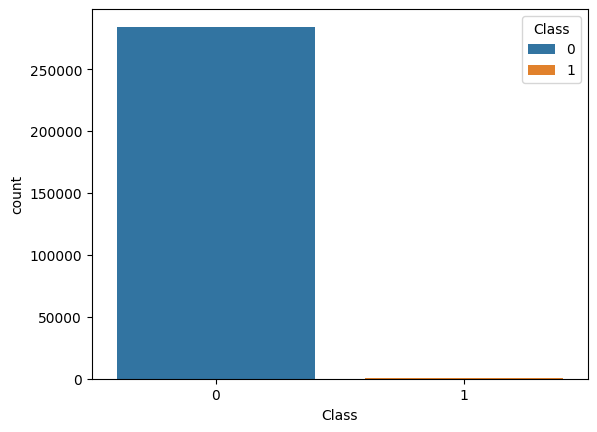

In [9]:
sns.countplot(x=df['Class'], data= df, hue='Class')

In [17]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()

df_train=df.copy()
df_train[['Time','Amount']] = s.fit_transform(df_train[['Time','Amount']])
df_train.head(2)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0


# Modelado de datos sin Balanceo

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score, confusion_matrix, f1_score, precision_score,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#dividir datos
x = df_train.drop(['Class'], axis = 1)
y = df_train['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42,test_size= 0.2)

lm =  LogisticRegression(solver='lbfgs', max_iter= 150)
tree = DecisionTreeClassifier(random_state=42)

lm.fit(x_train,y_train)
tree.fit(x_train,y_train)

prediction_lm = lm.predict(x_test)
prediction_lm_prob = lm.predict_proba(x_test)[:,1]
prediction_tree = tree.predict(x_test)
prediction_tree_prob = tree.predict_proba(x_test)[:,1]

print('logistica')
print(classification_report(y_test,prediction_lm))

print('arboles')
print(classification_report(y_test,prediction_tree))

print('AUC logistitca', roc_auc_score(y_test,prediction_lm))
print('AUC arboles', roc_auc_score(y_test,prediction_tree))

logistica
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

arboles
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

AUC logistitca 0.8009324790692867
AUC arboles 0.8976602247539421


# Modelos con datos Balanceados OVERSAMPLING

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

x, y = x_train, y_train
random = RandomOverSampler(sampling_strategy=0.5)
x_random, y_random = random.fit_resample(x,y)

#contar valores de y random
print(y_random.value_counts()*100/len(y_random))

lm = LogisticRegression(multi_class='multinomial', max_iter=150)
tree = DecisionTreeClassifier(random_state=42)

lm.fit(x_random,y_random)
tree.fit(x_random,y_random)

lm_predict = lm.predict(x_test)
tree_predict = tree.predict(x_test)

lm_predict_prob = lm.predict_proba(x_test)[:,1]
tree_predict_prob = tree.predict_proba(x_test)[:,1]

print('logistica')
print(classification_report(y_test,lm_predict))

print('arboles')
print(classification_report(y_test,tree_predict))

print('AUC logistitca', roc_auc_score(y_test,lm_predict))
print('AUC arboles', roc_auc_score(y_test,tree_predict))

Class
0    66.666764
1    33.333236
Name: count, dtype: float64
logistica
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.92      0.23        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962

arboles
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.71      0.77        98

    accuracy                           1.00     56962
   macro avg       0.91      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962

AUC logistitca 0.9538727561930793
AUC arboles 0.8570109635018893


# Modelos con datos Balanceados UNDERSAMPLING

In [20]:
X, y = x_train, y_train
random_ud = RandomUnderSampler()
X_ran,y_ran = random_ud.fit_resample(X,y)
print(y_ran.value_counts()*100/len(y_ran))
print(y_ran.value_counts())

lm = LogisticRegression(max_iter=150)
tree = DecisionTreeClassifier(random_state=42)

lm.fit(X_ran,y_ran)
tree.fit(X_ran,y_ran)

lm_predict = lm.predict(x_test)
tree_predict = tree.predict(x_test)

lm_predict_prob = lm.predict_proba(x_test)[:,1]
tree_predict_prob = tree.predict_proba(x_test)[:,1]

print('logistica')
print(classification_report(y_test,lm_predict))

print('arboles')
print(classification_report(y_test,tree_predict))

print('AUC logistitca', roc_auc_score(y_test,lm_predict))
print('AUC arboles', roc_auc_score(y_test,tree_predict))

Class
0    50.0
1    50.0
Name: count, dtype: float64
Class
0    394
1    394
Name: count, dtype: int64
logistica
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

arboles
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     56864
           1       0.01      0.91      0.03        98

    accuracy                           0.88     56962
   macro avg       0.51      0.90      0.48     56962
weighted avg       1.00      0.88      0.94     56962

AUC logistitca 0.9528021746121071
AUC arboles 0.8961539455399493
